# Vf vs average gains. 
- I have computed the optimal decision making as the parameters of value functions. 
- According to them I was making decisions, and the average gain was in hundreds of millions. Even thoug majority of time, there was zero gain. 

- I want to know, how much off is the value function approximation with the actuall average gains and repair this illogial results. Hopefully I will also solve the problem with heuristic strategy being better than the optimal one in the final results. 

## Testing idea 
- Lets make the simulation last only one time epoch.
- Lets look, how does a non-zero expected value hold with the realizations. Cut the Vf computation when the first large sparks are being profitable, look at what the expected value is and run the simulation what it can be...  

In [1]:
import sys
import os

sys.path.append("/Users/filiprolenec/Desktop/MT/MTpython/src")

In [2]:
last_epochs = 300

In [3]:
from progressbar import progressbar

from gas_example.optimization.vf import create_vfs_time_list, update_vf_models
from gas_example.setup import TIME_EPOCHS
from gas_example.simulation.state import State
from gas_example.enum_types import PowerplantState


from gas_example.optimization.optimization import get_best_action
from gas_example.simulation.simulation import balance_to_pce
from gas_example.enum_types import Action
from gas_example.setup import BORROW_RATE_EPOCH, RISK_FREE_RATE_EPOCH

import numpy as np
import matplotlib.pyplot as plt

def adp_algorithm_complete():
    vfs = create_vfs_time_list()

    for time_epoch_left in progressbar(range(last_epochs)):
        time_epoch = TIME_EPOCHS - time_epoch_left-1
        # Last Vf value is zero, no money to be gained.
        if time_epoch != TIME_EPOCHS - 1:
            update_vf_models(vfs[time_epoch], vfs[time_epoch + 1])
    return vfs

N/A% (0 of 300) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

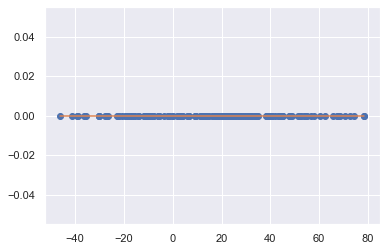

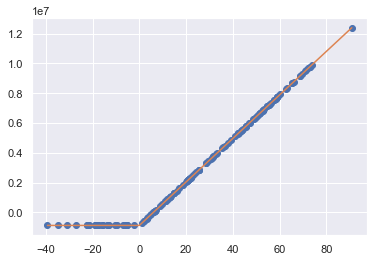

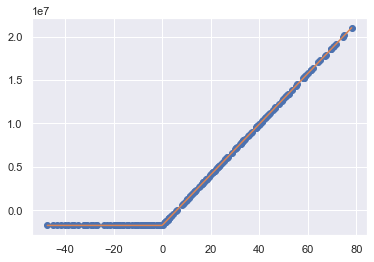

  0% (2 of 300) |                        | Elapsed Time: 0:01:16 ETA:   3:10:12

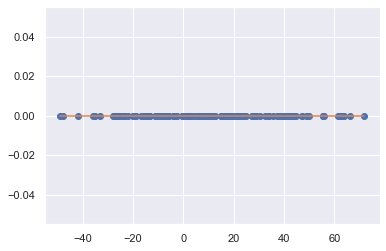

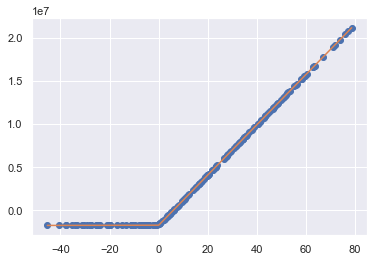

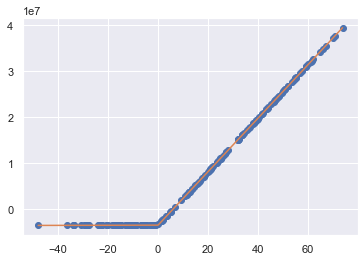

  1% (3 of 300) |                        | Elapsed Time: 0:02:42 ETA:   7:05:37

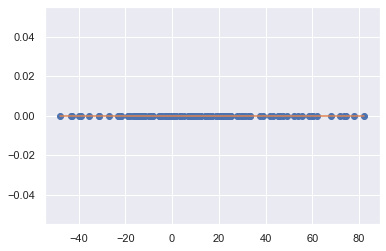

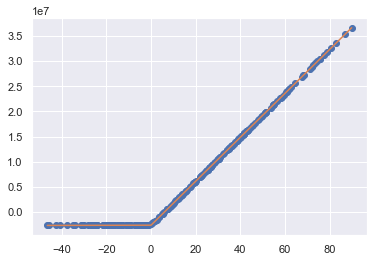

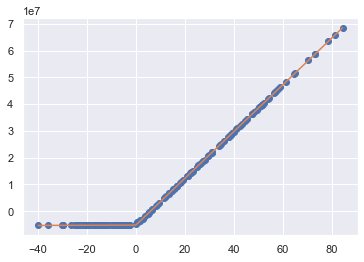

  1% (4 of 300) |                        | Elapsed Time: 0:04:09 ETA:   7:09:25

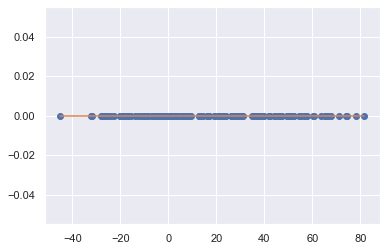

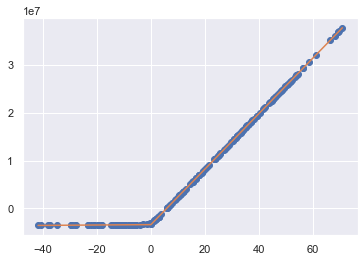

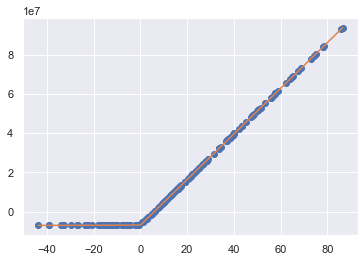

  1% (5 of 300) |                        | Elapsed Time: 0:05:28 ETA:   6:26:46

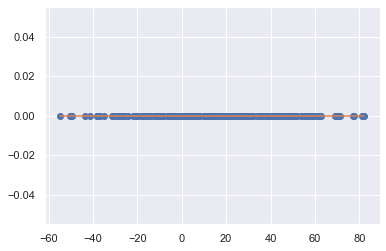

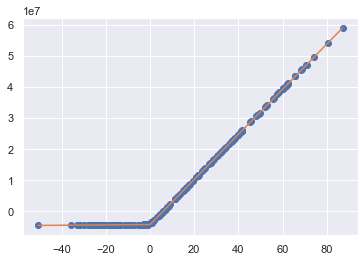

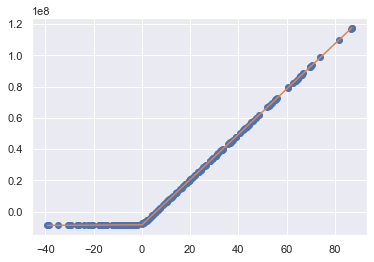

  2% (6 of 300) |                        | Elapsed Time: 0:06:50 ETA:   6:45:16

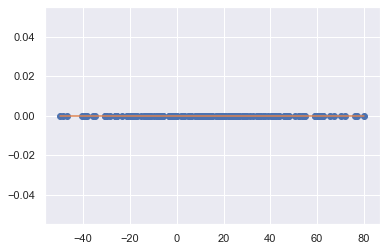

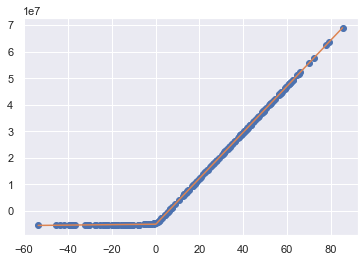

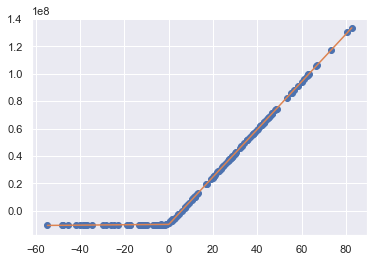

  2% (7 of 300) |                        | Elapsed Time: 0:08:12 ETA:   6:37:39

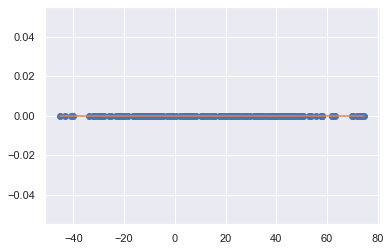

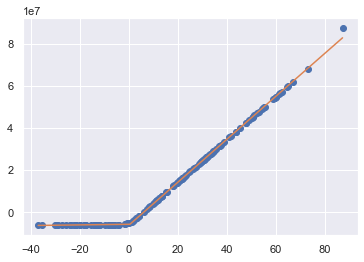

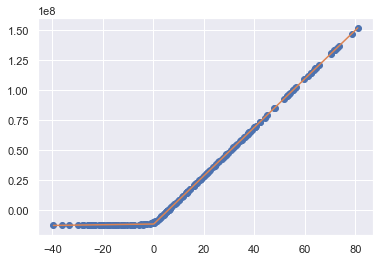

  2% (8 of 300) |                        | Elapsed Time: 0:09:24 ETA:   5:48:24

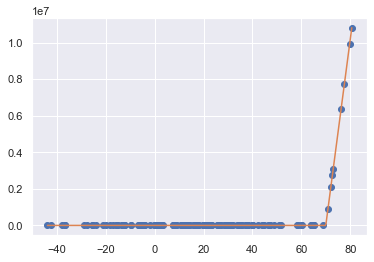

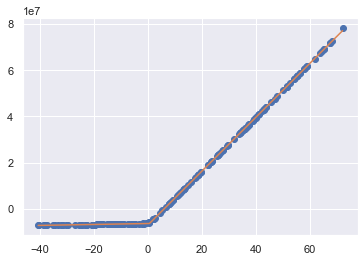

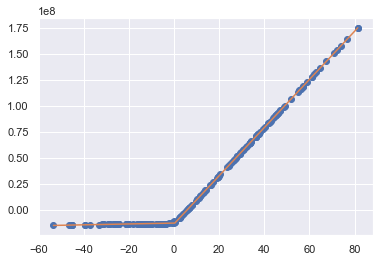

  3% (9 of 300) |                        | Elapsed Time: 0:10:42 ETA:   6:20:23

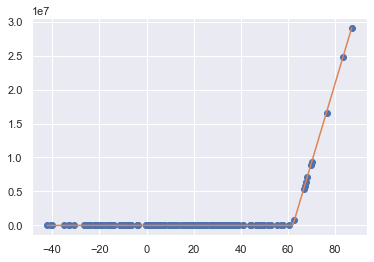

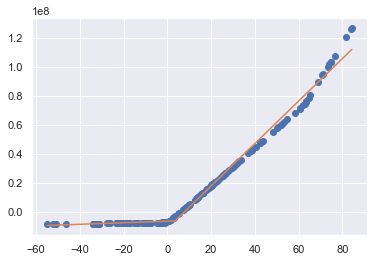

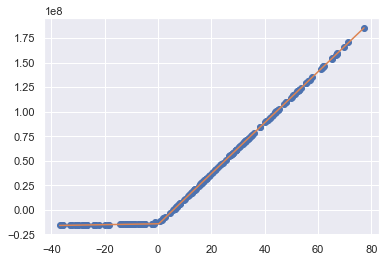

  3% (10 of 300) |                       | Elapsed Time: 0:11:55 ETA:   5:50:55

KeyboardInterrupt: 

In [5]:
vfs = adp_algorithm_complete()

### VF for only last 5 time epochs 
- We know the Vf for epoch 300. 
- We are computing 299,298,297,296 and 295. 

- In time epoch 295 we look at the expected pce gain by the value function for these 5 epochs. 

- Then we simulate behaving based on this Vf and record the gains... 

In [ ]:
from gas_example.optimization.optimization import get_best_action
from gas_example.optimization.basis_function import uf_2_inv


In [ ]:
vfs_0 = vfs[TIME_EPOCHS - last_epochs]
vfs_1 = vfs[TIME_EPOCHS - last_epochs+1]
vfs_2 = vfs[TIME_EPOCHS-1]


In [ ]:
init_state=State(10, 25, 45, PowerplantState.NOT_BUILT, 0)


In [ ]:
expected_utility = vfs_0.compute_value(init_state)
expected_utility

In [ ]:
result_1 = uf_2_inv(expected_utility)/1_000_000
result_1

In [ ]:
def balance_to_pce(balance):
    if balance > 0:
        pce = balance / (RISK_FREE_RATE_EPOCH ** (last_epochs-1))
    else:
        pce = balance / (BORROW_RATE_EPOCH ** (last_epochs-1))

    return pce

239M 

Thus we expect to gain 240 milions, when deciding based on these Vfs from the initial state stated above

In [ ]:
from gas_example.optimization.optimization import get_best_action, pce

In [ ]:
final_pces = []
for i in progressbar(range(1000)):
    state = init_state
    fcfs = []
    for epoch in range(last_epochs-1):
        action, exp_utility_this_action = get_best_action(state, vfs[TIME_EPOCHS-last_epochs+epoch+1])
        state, fcf = state.get_new_state_and_fcf(action)
        fcfs.append(fcf)
    final_pces.append(round(balance_to_pce(state.balance) / 1000000.0, 5))
    

In [ ]:
plt.hist(final_pces)

In [ ]:
result_2 = np.mean(final_pces)
result_2

In [ ]:
result_2 - result_1

In [ ]:
(result_2 - result_1)/result_2*100

In [ ]:
pd.DataFrame(final_pces).to_csv("Results_10_25_45_important.csv")

2.17

In [ ]:
state = init_state

In [ ]:
state = init_state
fcfs = []
for epoch in range(last_epochs-1):
    action, exp_utility_this_action = get_best_action(state, vfs[TIME_EPOCHS-last_epochs+epoch+1], True)
    print(action)
    print(exp_utility_this_action)
    state, fcf = state.get_new_state_and_fcf(action)
    print(state.to_dict())
    fcfs.append(fcf)
    print(f"Fcf: {fcf}")
    print(f"Balance {state.balance}")
    

In [ ]:
import pandas as pd

In [ ]:
df_vfs = pd.DataFrame(vfs)
identificator = pd.Timestamp.now().strftime("%Y-%m-%d_H%H")
df_vfs.to_pickle(f'saved_vfs/vfs_{identificator}.pkl')